# Introdução
O relatório visa analisar os dados dos passageiros que estavam no acidente do Titanic. E com isso responder algumas questões relevantes que podem ser retirada dos dados oferecidos.Para isso as perguntas respondidas foram:

1. Quantas pessoas sobreviveram ao acidente? E quantas não sobreviveram?
2. Qual a faixa etária dos que estavam no Titanic?
3. Qual a média de sobrevivência por idade?
4. Qual o sexo dos que estavam no Titanic?
5. Qual a média de sobreviventes por sexo?

# 1° Etapa
### Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2° Etapa
### Lendo o dataset

In [2]:
titanic = pd.read_csv('titanic-data-6.csv')

###  Mostrando a estrutura da tabela

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- Verificando valores faltantes.

In [4]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 3° Etapa:
### Limpando dados

Excluindo algumas colunas que não serão utilizadas no momento: 

- Ticket;
- Pclass;
- Cabin;
- Fare;
- PassengerID; 
- SibSp.

Também realizado uma média da idade para preencher os valores vazios na coluna 'Age'

In [5]:
#Limpa Coluna e Valores: Recebe a coluna desejada e o valor a ser filtrado e remove os itens com estas características.
def limpa(coluna,valor):
    titanic[coluna].fillna(valor,inplace=True)
    return titanic.head(6)
    
# Remove coluna: Retira as colunas indicadas na passagem de parametros
def remove(colunas):
    for i in range(0, len(colunas)):
        titanic.drop([colunas[i]],axis = 1, inplace = True)
    return titanic.head()

# Completando as idades que faltam com a média de idade
media = titanic['Age'].mean()
titanic['Age'].fillna(media, inplace=True)

colunas = ['Pclass','Fare','Ticket','Cabin','PassengerId','SibSp', 'Embarked']
remove(colunas)

,Survived,Name,Sex,Age,Parch
0,0,"Braund, Mr. Owen Harris",male,22.0,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,0
2,1,"Heikkinen, Miss. Laina",female,26.0,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,0
4,0,"Allen, Mr. William Henry",male,35.0,0


### Conferindo novamente os dados faltantes.

In [6]:
titanic.isnull().sum()

Survived    0
Name        0
Sex         0
Age         0
Parch       0
dtype: int64

# 4° Etapa:
### Fazendo perguntas

# Pergunta 1: Qual a porcentagem dos passageiros sobreviventes? 

Sobreviventes     : 342
Não Sobreviventes : 549


Text(0, 0.5, '')

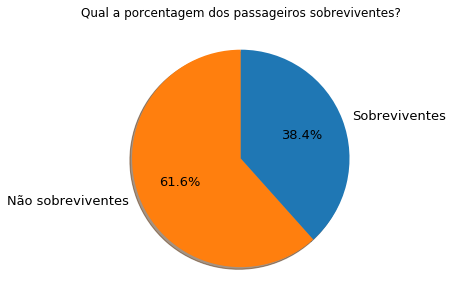

In [7]:
#Cria um mapa indicando os Sobreviventes e não sobreviventes
titanic['Not Survived'] = titanic['Survived'].map({0:1,1:0})

#Conta os valores encontrados e exibe na tela
print('Sobreviventes     :', titanic['Survived'].value_counts()[1])
print('Não Sobreviventes :', titanic['Survived'].value_counts()[0])

#Gerando o grafico
titanic['Survived'].value_counts().plot.pie(colors=('tab:orange', 'tab:blue'),title='Qual a porcentagem dos passageiros sobreviventes?',fontsize=13, shadow=True,startangle=90,autopct='%1.1f%%',
labels=('Não sobreviventes','Sobreviventes'),
figsize=(5,5)).set_ylabel('')

- Podemos verificar pelo gráfico que apenas 38,4% dos passageiros do Titanic sobreviveram ao naufrágio.

- Mesmo o Titanic sendo considerado o navio mais luxuoso e seguro daquela época, inclusive gerando ideia de que ele seria "inafundável", podemos ver que a maior parte dos passageiros infelizmente morreu na tragédia.

# Pergunta 2: Qual a faixa etária dos passageiros do Titanic? 

In [8]:
titanic_idade = titanic.copy()
titanic_idade.drop(titanic[titanic['Age'].isnull() == True].index ,inplace=True)

Text(0, 0.5, 'Frequência')

<Figure size 432x288 with 0 Axes>

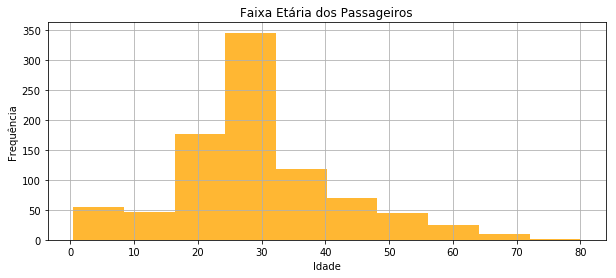

In [9]:
plt.figure();
titanic_idade.hist(column='Age', color=('orange'), alpha=0.8, bins=10, figsize=(10,4))
plt.title('Faixa Etária dos Passageiros')
plt.xlabel('Idade')
plt.ylabel('Frequência')

- Pelo histograma, concluimos que a maior parte dos passageiros girava na faixa etária entre 20 e 40 anos, aproximadamente.
- Assim podemos concluir que o navio transportava todos os tipos de pessoas de diferentes idades.

# Pergunta 3: Qual a média de sobrevivência por idade?

(Text(0, 0.5, ''), Text(0.5, 0, ''))

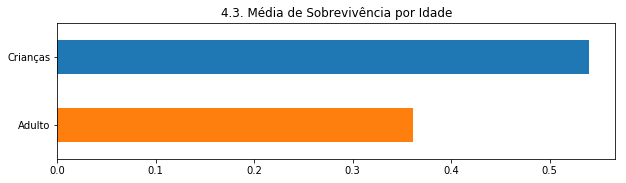

In [10]:
titanic_idade['Crianca_Adulto'] = 0
titanic_idade.loc[titanic_idade[titanic_idade['Age'] < 18].index, 'Crianca_Adulto'] = 'Crianças'
titanic_idade.loc[titanic_idade[titanic_idade['Age'] >= 18].index, 'Crianca_Adulto'] = 'Adulto'
titanic_idade.groupby('Crianca_Adulto')[['Survived']].mean()

titanic_idade.groupby('Crianca_Adulto')['Survived'].mean().plot.barh(title='4.3. Média de Sobrevivência por Idade', figsize=(10,2.5),
                                                                color=('tab:orange','tab:blue')).set_ylabel(''),plt.xlabel('')


- Podemos ver que os que mais sobreviveram a tragédia foram menores de idade, possívelmente crianças.
- Já os adultos, possívelmente pela regra de mulheres e crianças primeiros fez com que proporcionalmente as criaças obtiveram mais sobreviventes.

# Pergunta 4: Qual o sexo dos passageiros do Titanic?

In [11]:
masculino = titanic.query('Sex == "male"').shape[0]
feminino = titanic.query('Sex == "female"').shape[0]
total_sex = masculino+feminino
print('Total de Passageiros {}: Homens: {}, Mulheres: {}'.format(total_sex, masculino,feminino))

Total de Passageiros 891: Homens: 577, Mulheres: 314


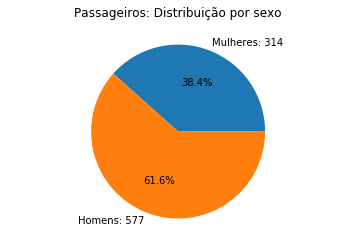

In [12]:
sobreviv = titanic.query('Survived == "1"')
n_sobreviv = titanic.query('Survived == "0"')
qtd_sobreviv = sobreviv.shape[0]
qtd_n_sobreviv = n_sobreviv.shape[0]
x_list=[qtd_sobreviv,qtd_n_sobreviv]
x_sexo=[masculino,feminino]
labels_sex=['Mulheres: {}'.format(feminino), 'Homens: {}'.format(masculino)]
plt.axis('equal')
plt.pie(x_list, labels=labels_sex, autopct='%1.1f%%')
plt.title('Passageiros: Distribuição por sexo')
plt.show()

- Verificando o gráfico, podemos observar que a maior parte dos passageiros eram do sexo masculino.
- Com essa observação me veio a curiosidade de que os homens em números deveriam ter sobrevivido a mais do que as mulheres, então para testar o fato, criei a pergunta de "Qual a sobrevivência por sexo ?".

# Pergunta 5: Qual a sobrevivência por sexo?

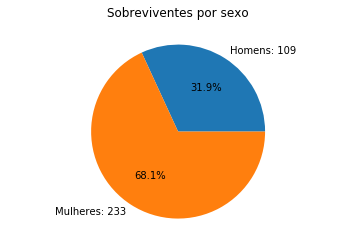

In [13]:
sob_homens = sobreviv.query('Sex == "male"').shape[0]
sob_mulheres = sobreviv.query('Sex == "female"').shape[0]
x_list_sexo=[sob_homens,sob_mulheres]
labels_sex=['Homens: {}'.format(sob_homens),'Mulheres: {}'.format(sob_mulheres) ]
plt.axis('equal')
plt.pie(x_list_sexo, labels=labels_sex, autopct='%1.1f%%')
plt.title('Sobreviventes por sexo')
plt.show()

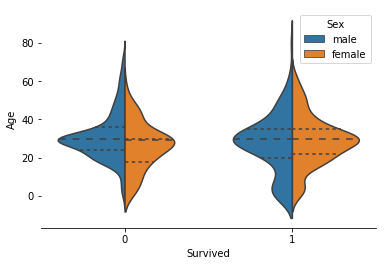

In [14]:
sns.violinplot(x="Survived", y="Age", hue="Sex", data=titanic, split=True,
inner="quart")
sns.despine(left=True)

- Com esses dois gráficos podemos perceber que apesar do gráfico da pergunta 4, nos dizer que o número de homens é maior que o de mulheres, ainda sim, o número de sobreviventes do sexo feminino é maior que o número de sobreviventes do sexo masculino.

# Conclusões

Podemos perceber com os dados deixados para estudarmos que que apenas 38,4% dos passageiros do Titanic sobreviveram, o que é exatamente 342 pessoas em um total de 891 passageiros.

Foi identificado também que as crianças apesar de serem um número maior, ainda sim tiveram uma maior taxa de sobrevivência.

As mulheres, assim como as crianças, apesar de serem o menor número da população do navio (314 mulheres entre 577 homens), foi a que teve a maior taxa de sobrevivência, sendo 233 mulheres contra 109 homens.

Possívelmente isso seria devido a aquela regra de mulheres e crianças primeiro para entrarem nos botes e se salvarem.

# Limitações

- Nem todos os dados foram utilizados, o que fazem no momento eles não serem úteis para mim, por isso foram retirados do dataset

- No campo 'Age' que foi um utilizado, não estava completo, faltava 177 dados de passageiros, para isso decidi realizar uma média das idades para preencher os campos que faltavam com esse valor.

# Bibliografia

- Documentação do pandas: https://pandas.pydata.org/
- Documentação Matplotlib: https://matplotlib.org
- História Titanic: https://pt.wikipedia.org/wiki/RMS_Titanic